In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from yellowbrick.features import FeatureImportances

Populating the interactive namespace from numpy and matplotlib
C:\Users\jason\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
ft_trgt_df = pd.read_csv('3_post_data_clean.csv', index_col=0, header=0)

In [3]:
ft_trgt_df.sample(5)

,dead_cap,defense,injured,offense,specialty,w,l,playoff
yr_team,,,,,,,,
2014_cleveland-browns,0.147119,0.451957,0.019486,0.365037,0.016401,7,9,no
2018_miami-dolphins,0.117195,0.398637,0.156005,0.316066,0.012096,7,9,no
2014_indianapolis-colts,0.047205,0.449888,0.133743,0.323022,0.046142,11,5,yes
2019_cleveland-browns,0.157002,0.328422,0.083503,0.422010,0.009063,6,10,no
2019_denver-broncos,0.188213,0.343394,0.205554,0.231111,0.031728,7,9,no


In [6]:
ft_trgt_df.loc[['2019_cincinnati-bengals', '2019_san-francisco-49ers','2019_kansas-city-chiefs', '2019_washington-redskins']].sort_values(by='w', ascending=False)[['offense','defense','specialty', 'dead_cap', 'injured','w']].to_csv('sample_rows.csv', mode='w')

In [7]:
# LR
lr = LinearRegression()
X = ft_trgt_df[['dead_cap', 'injured', 'offense', 'specialty']]
y = ft_trgt_df['w']
lr.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr.coef_

array([-10.97416467, -14.99819321,   1.74237888,  22.63396573])

In [9]:
# OLS -> Ordinary Least Squares
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     20.57
Date:                Sun, 26 Jan 2020   Prob (F-statistic):           4.77e-14
Time:                        15:58:18   Log-Likelihood:                -450.17
No. Observations:                 191   AIC:                             910.3
Df Residuals:                     186   BIC:                             926.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9564      1.726      5.769      0.000       6.552      13.361
d

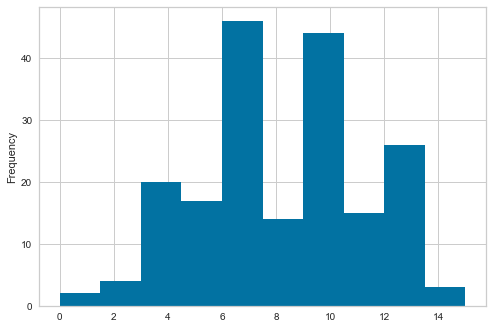

In [10]:
# matplotlib histogram 
y.plot.hist()

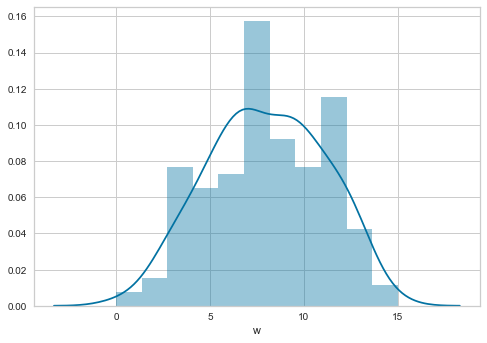

In [11]:
# Seaborn distribution plot - combination of a histogram and kde/kernel density estimate. 
sns.distplot(y)

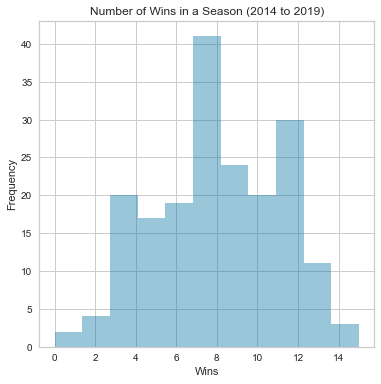

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot(ft_trgt_df['w'], kde=False)
ax.set_xlabel('Wins')
ax.set_ylabel('Frequency')
ax.set_title('Number of Wins in a Season (2014 to 2019)')
fig = ax.get_figure()
fig.savefig(r"C:\Users\jason\OneDrive\Documents\Jason\NYC Data Science Academy\projects\web_scraping\presentation\plots\hist_of_wins.png")

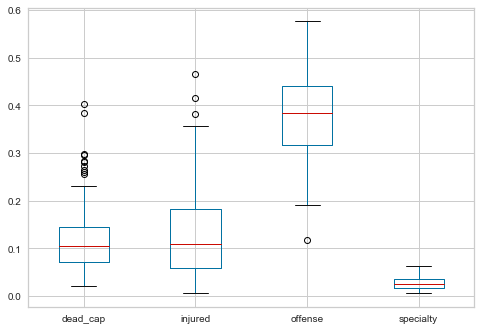

In [13]:
# matplotlib boxplot of features
X.plot.box()

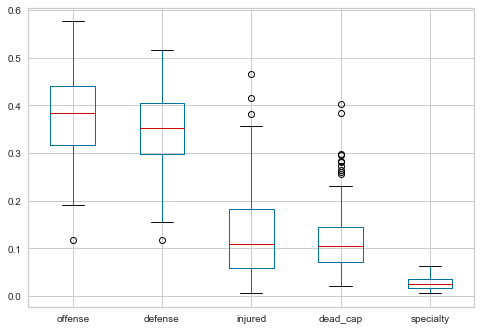

In [14]:
# same as above except for defense column added
ft_trgt_df[['offense','defense','injured', 'dead_cap', 'specialty']].plot.box()

C:\Users\jason\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


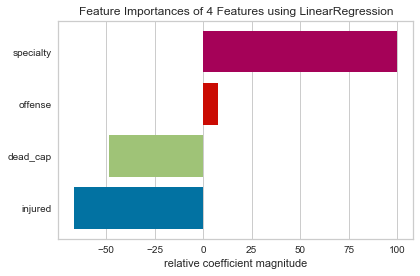

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(
    model=lr,
    labels=['dead_cap', 'injured', 'offense', 'specialty']
)
fi_viz.fit(X=X, y=y)
fi_viz.poof()

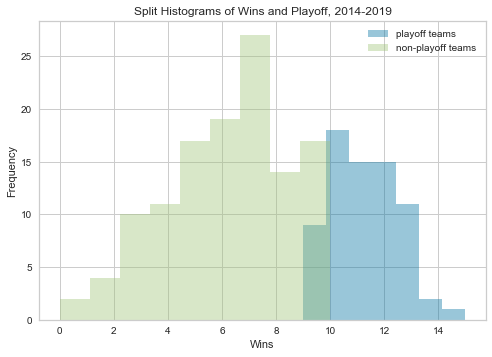

In [8]:
# dual histogram re: playoff and non-playoff teams 
df = pd.read_csv('nfl_standings.csv', index_col=0, header=0)
df_playoff = df.loc[df['playoff'] == 'yes', ['team','w', 'playoff']]
df_no_playoff = df.loc[df['playoff'] == 'no', ['team','w', 'playoff']]
sns.distplot(df_playoff['w'],  kde=False, label='playoff teams')
sns.distplot(df_no_playoff['w'],  kde=False, label='non-playoff teams')
	
# Plot formatting

plt.legend(prop={'size': 10})
plt.title('Split Histograms of Wins and Playoff, 2014-2019')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\jason\OneDrive\Documents\Jason\NYC Data Science Academy\projects\web_scraping\presentation\plots\dual_hist_of_wins.png")

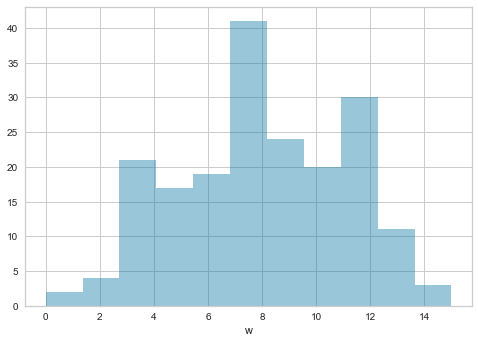

In [7]:
sns.distplot(df['w'], kde=False)